In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D, axes3d
import numpy as np

In [2]:
train = pd.read_csv("../input/train.csv")

In [3]:
train.dropna(inplace=True)

In [4]:
ddd_data = train[["Date","WnvPresent","Latitude","Longitude","NumMosquitos"]]

In [5]:
ddd_data["Date"] = pd.to_datetime(ddd_data["Date"])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
# # def plot_data_from_date(date, this_figure, count = 1):
# #     year = date.split('-')[0]
# for year in [2007, 2009, 2011, 2013]:
#     ddd = ddd_data[((ddd_data['Date'] > str((year - 1))) & (ddd_data['Date'] < str((year + 1))))]
#     plt.figure(figsize=(20,16))
#     ax = fig.gca(projection='3d')
#     z = ddd["Longitude"]
#     x = ddd["Date"].values.tolist()
#     y = ddd["Latitude"]
#     s = [x*x for x in ddd["NumMosquitos"].values.tolist()]
#     c = [[x, (1 - x), (1 - x), (.4 if x == 1 else .25)] for x in ddd["WnvPresent"].values.tolist()]
#     plt.axis('off')
#     plt.title(f"LatLong WnvPresent for {year}")
#     ax.scatter(x, y, z, label='West Nile Virus', s=s, c=c)
# #     file_name = f"{year}-{count}.png"
# #     print(f"Saving the following picture: {file_name}")
# #     plt.savefig(f"./animations/3d_pictures/{file_name}")
# #     return fig

In [7]:
# # I thought I could recursively create a plot
# # and then pass the figure to the next frame
# # as to keep stacking without needing to 
# # recalculate the total data
# def recurse_dates(year=2007, month=5, day=1, figure=None, count = 1):
#     day_to_check = 30 if (month == 6 or month == 9) else 31
#     this_figure = plt.figure(figsize=(20,16)) if figure == None else figure
#     if(year < 2014):
#         date = "{}-{}-{}".format(year, month, day)
#         modded_figure = plot_data_from_date(date, this_figure, count)
#         if (month < 11):
#             if (day <  day_to_check):
#                 return recurse_dates(year, month, (day + 1), figure=modded_figure,  count = (count + 1))
#             else:
#                 if((month + 1) == 11 and day == 31):
#                     return recurse_dates((year + 2), month=5, day=1, figure=None)
#                 else:    
#                     return recurse_dates(year, (month + 1), day=1, figure=modded_figure, count = (count + 1))
#     else:
#         print("Done")
#         return
    
# recurse_dates()

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


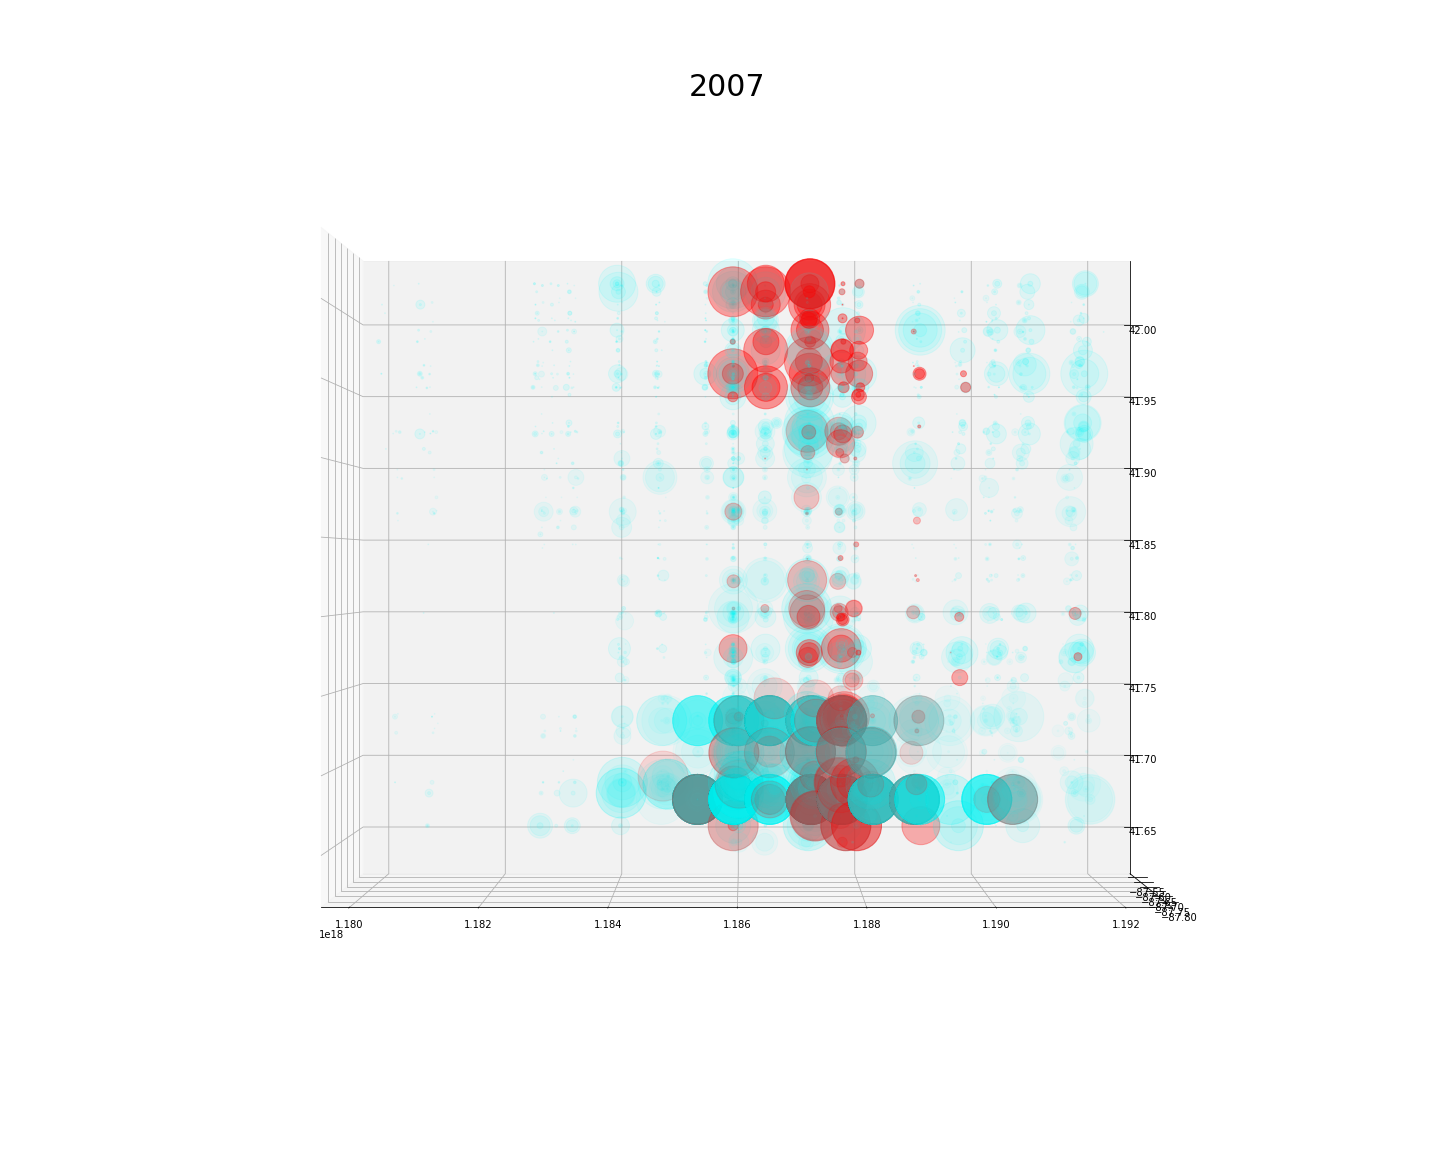

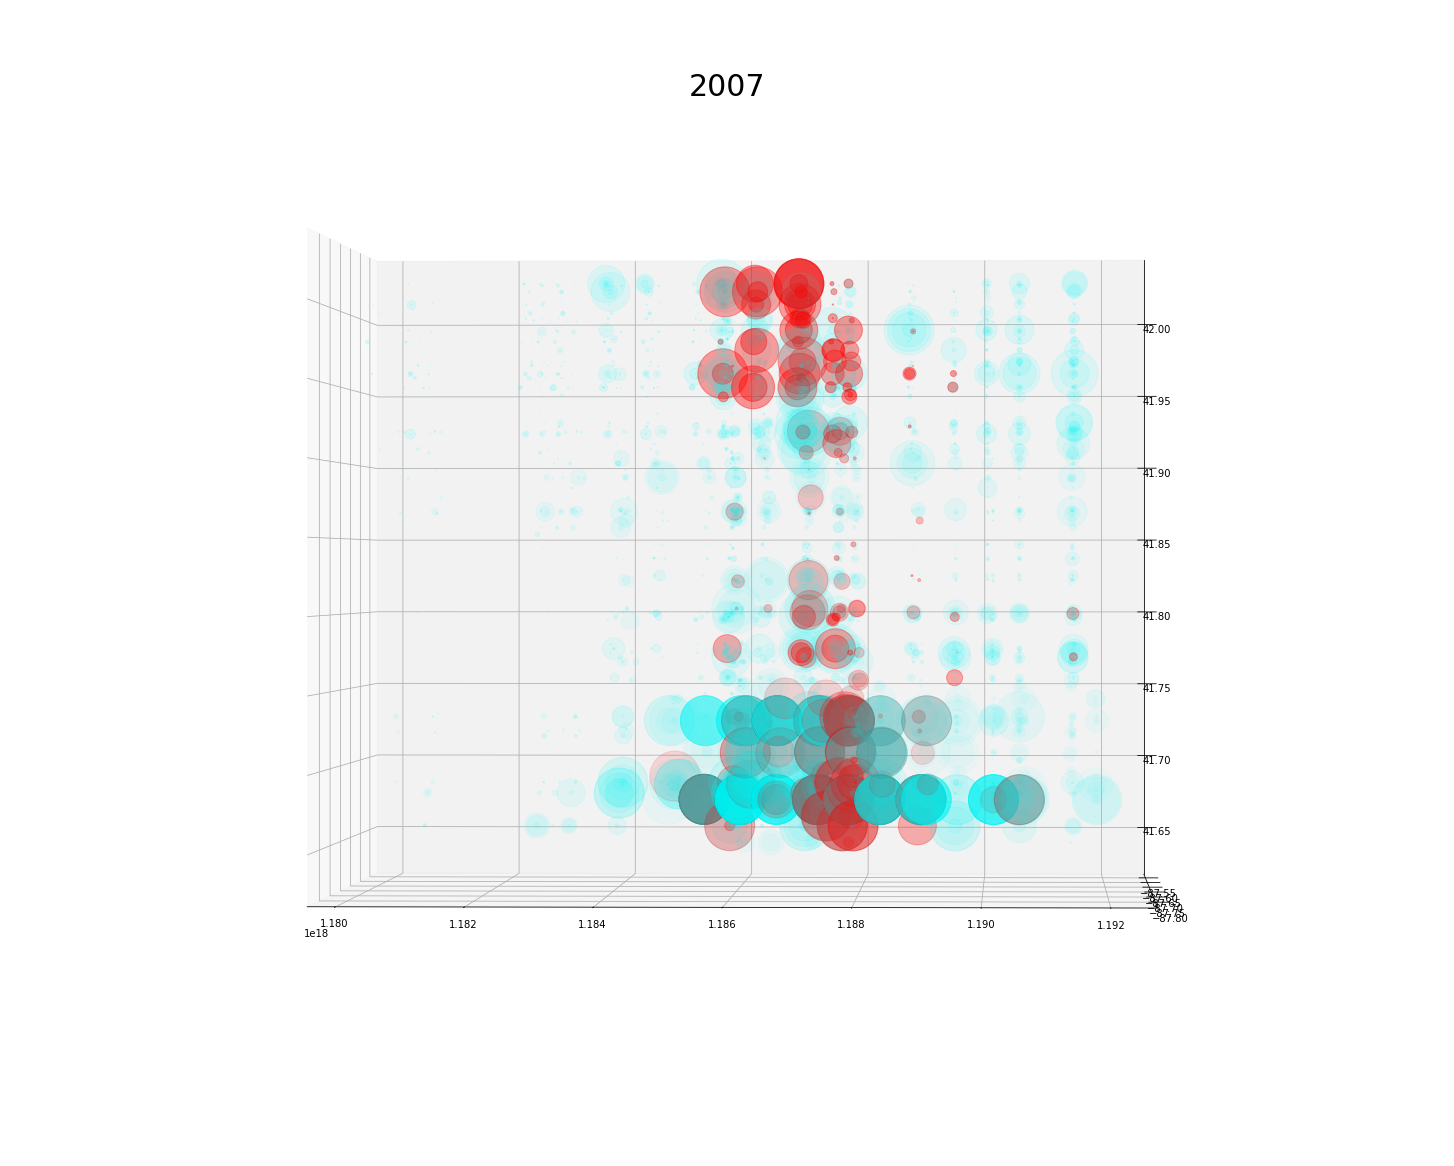

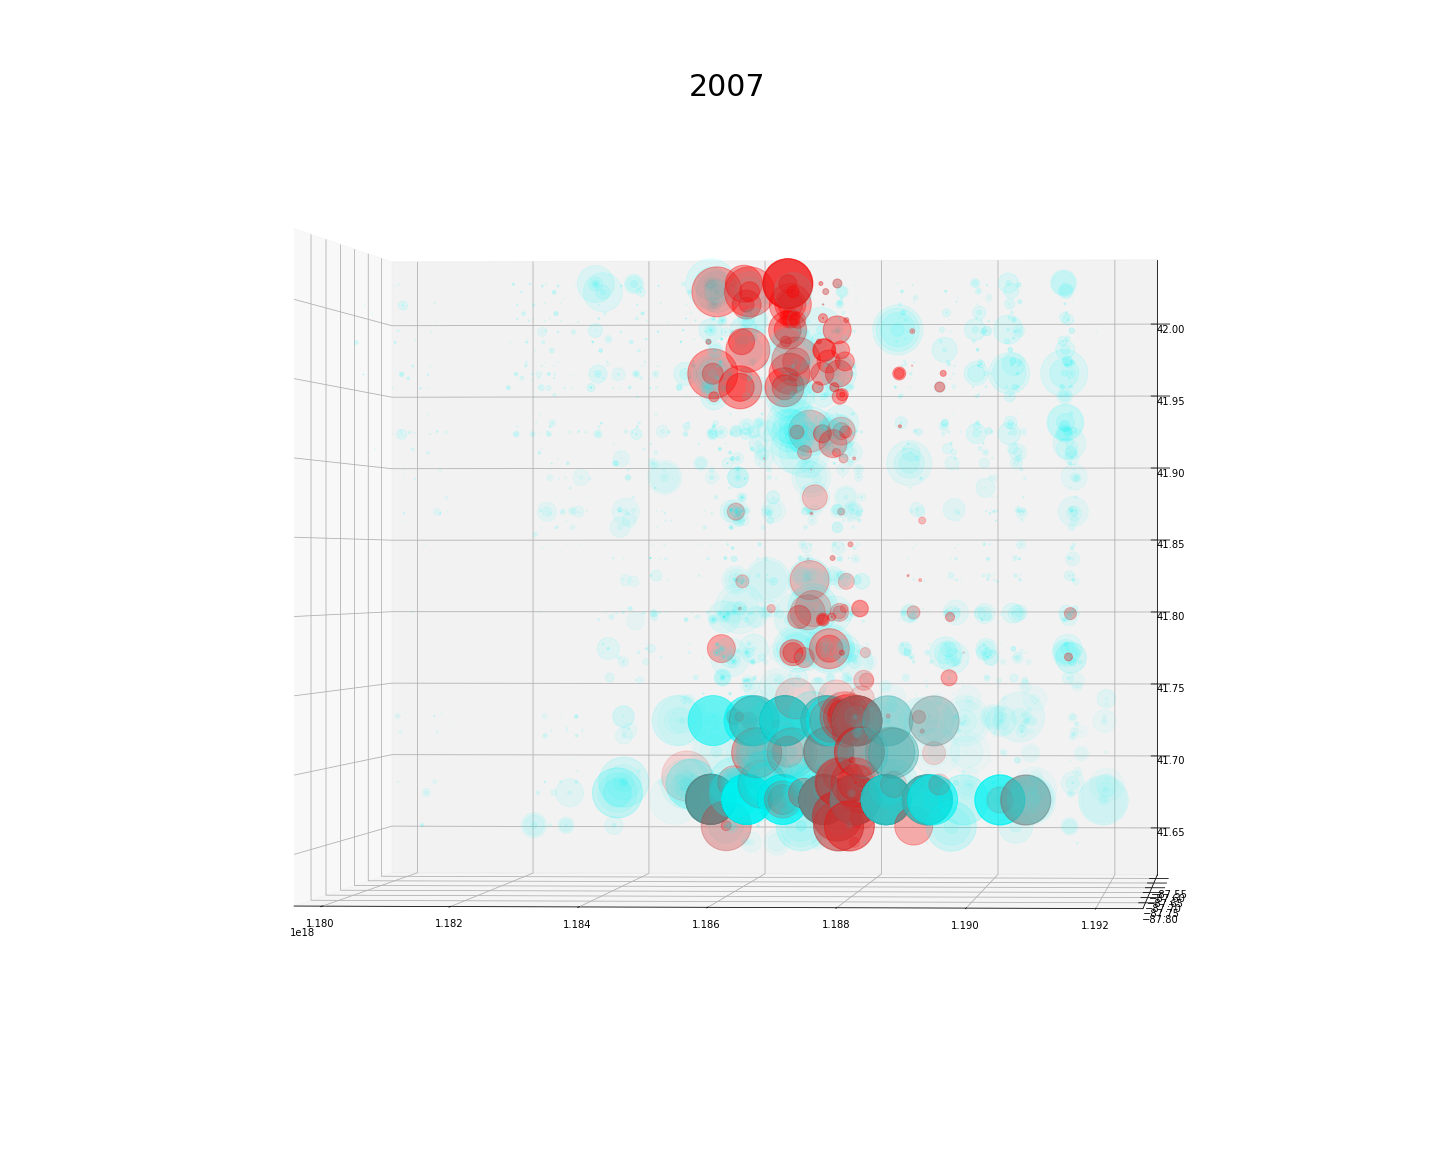

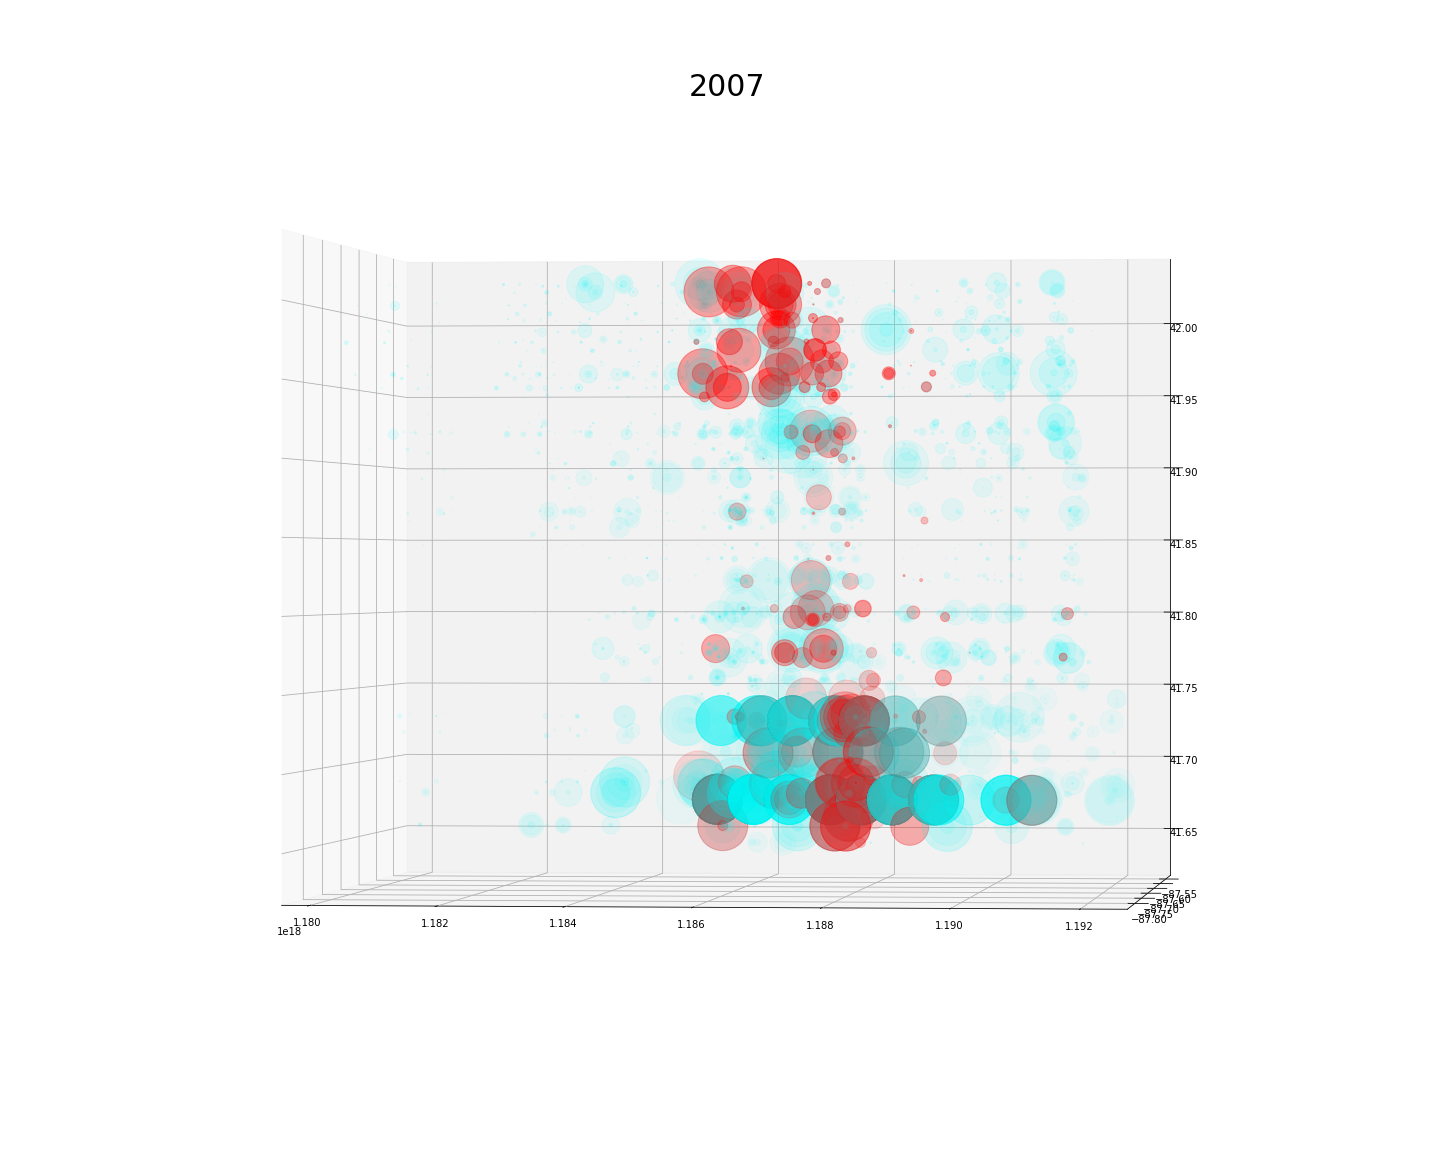

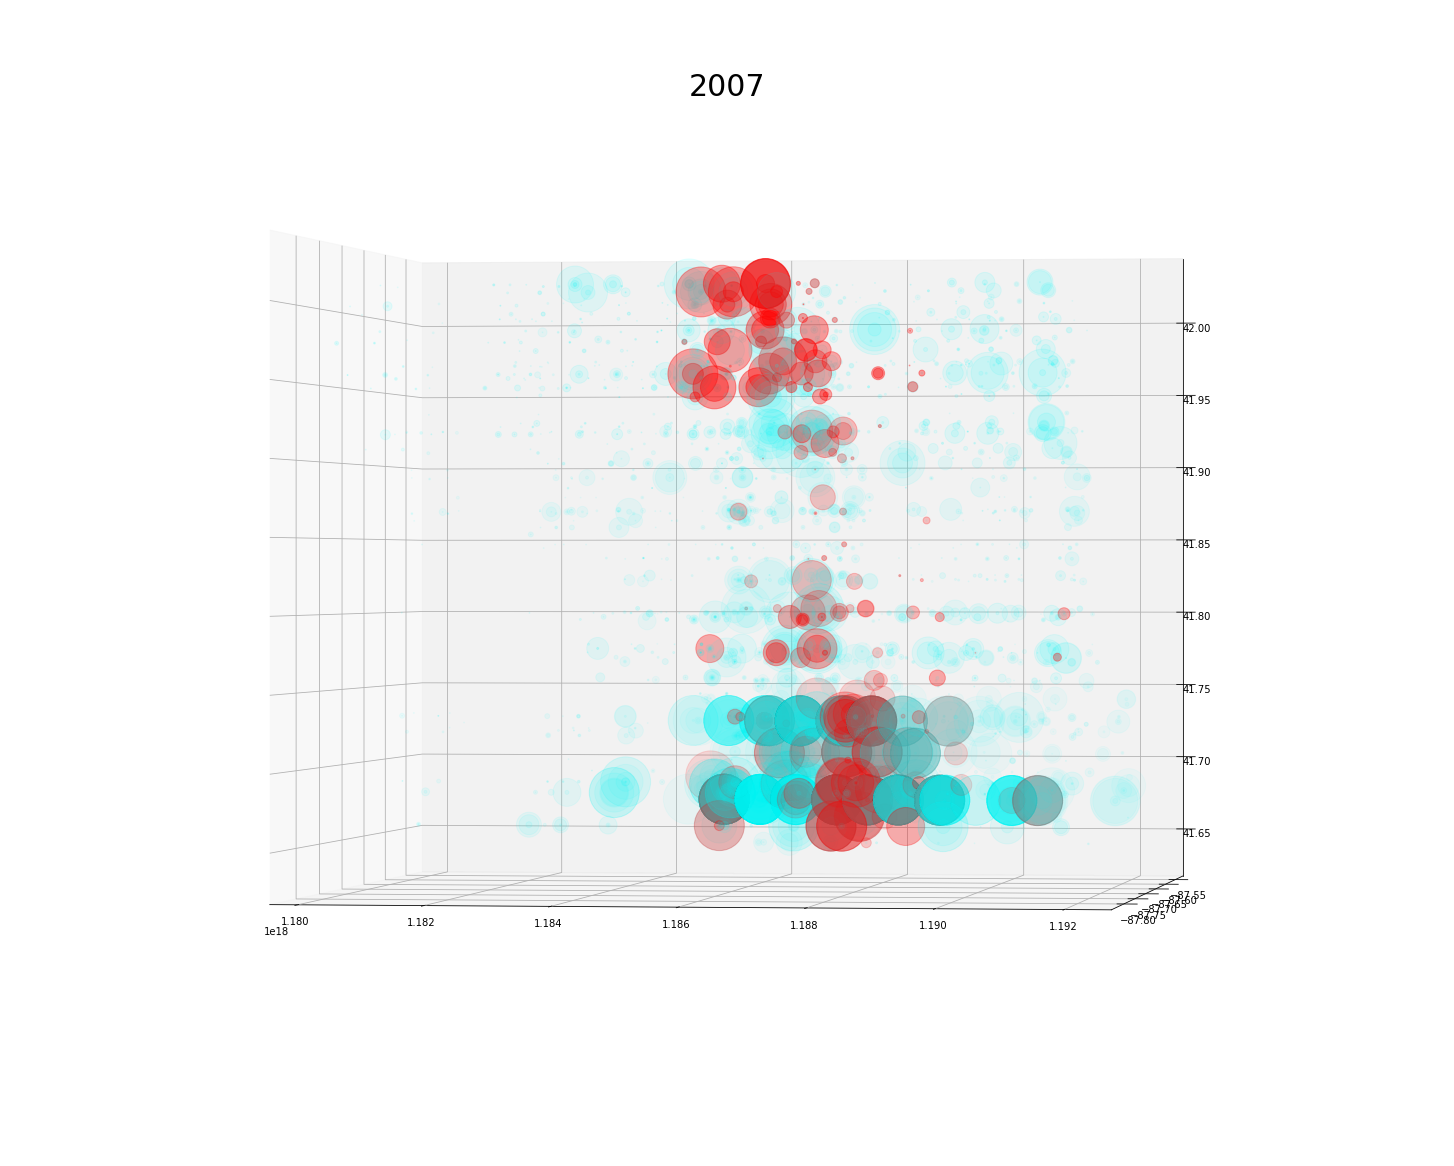

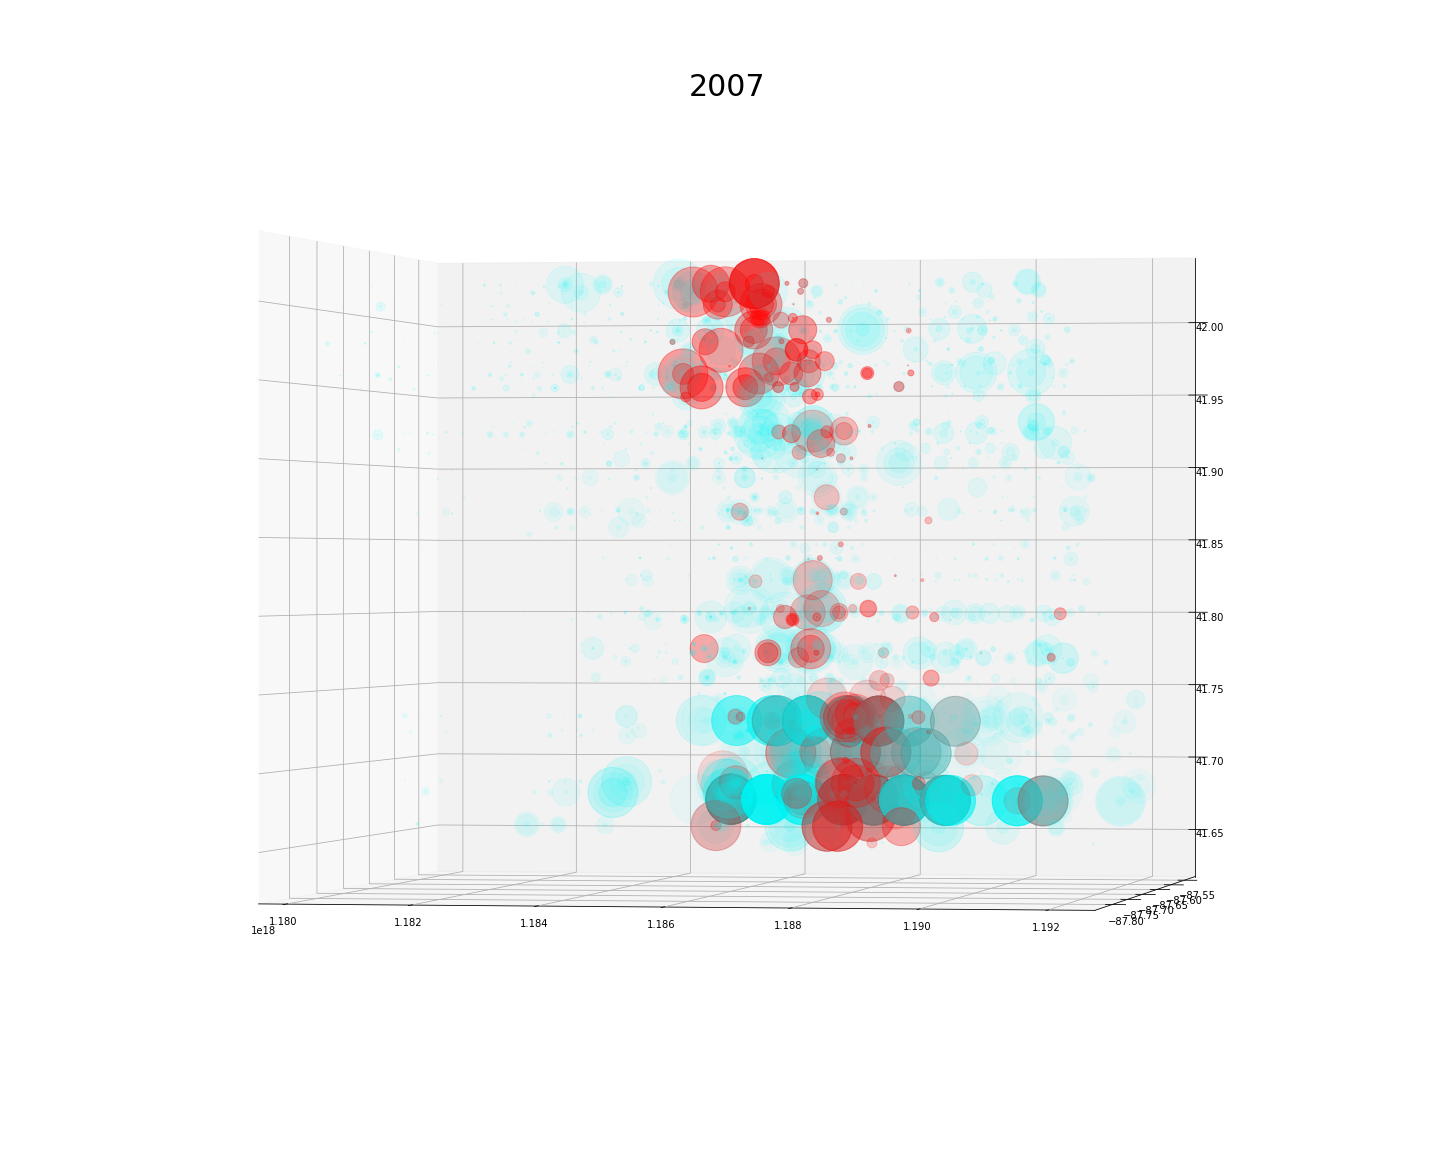

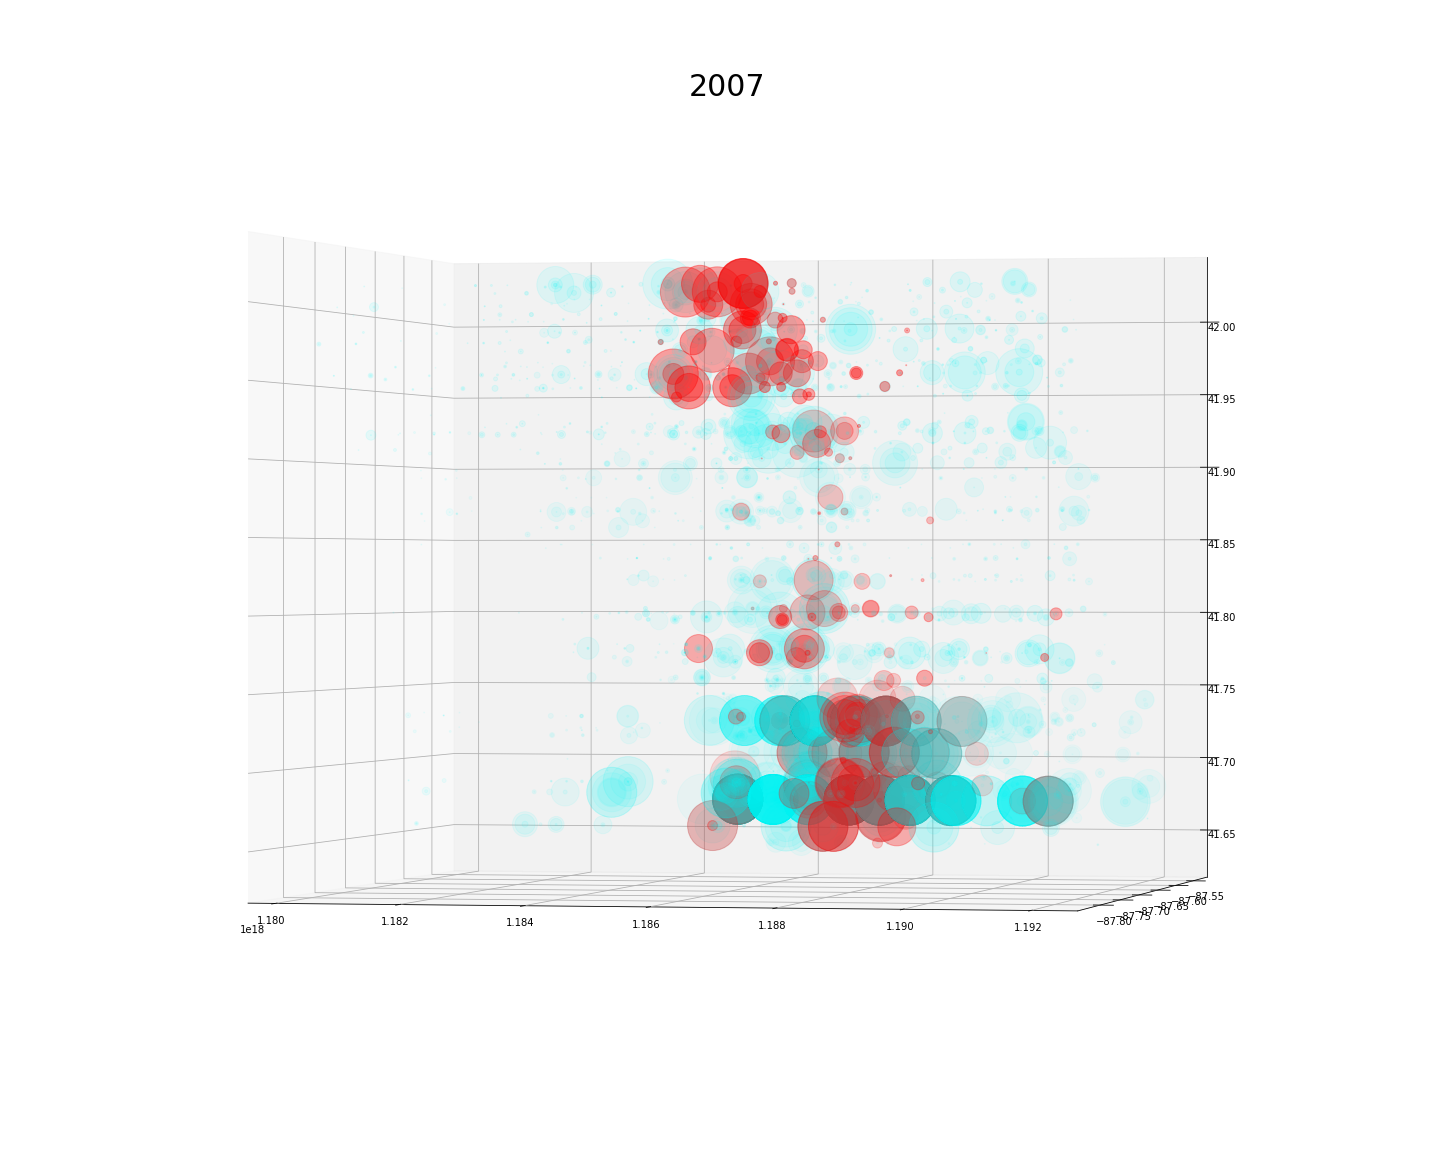

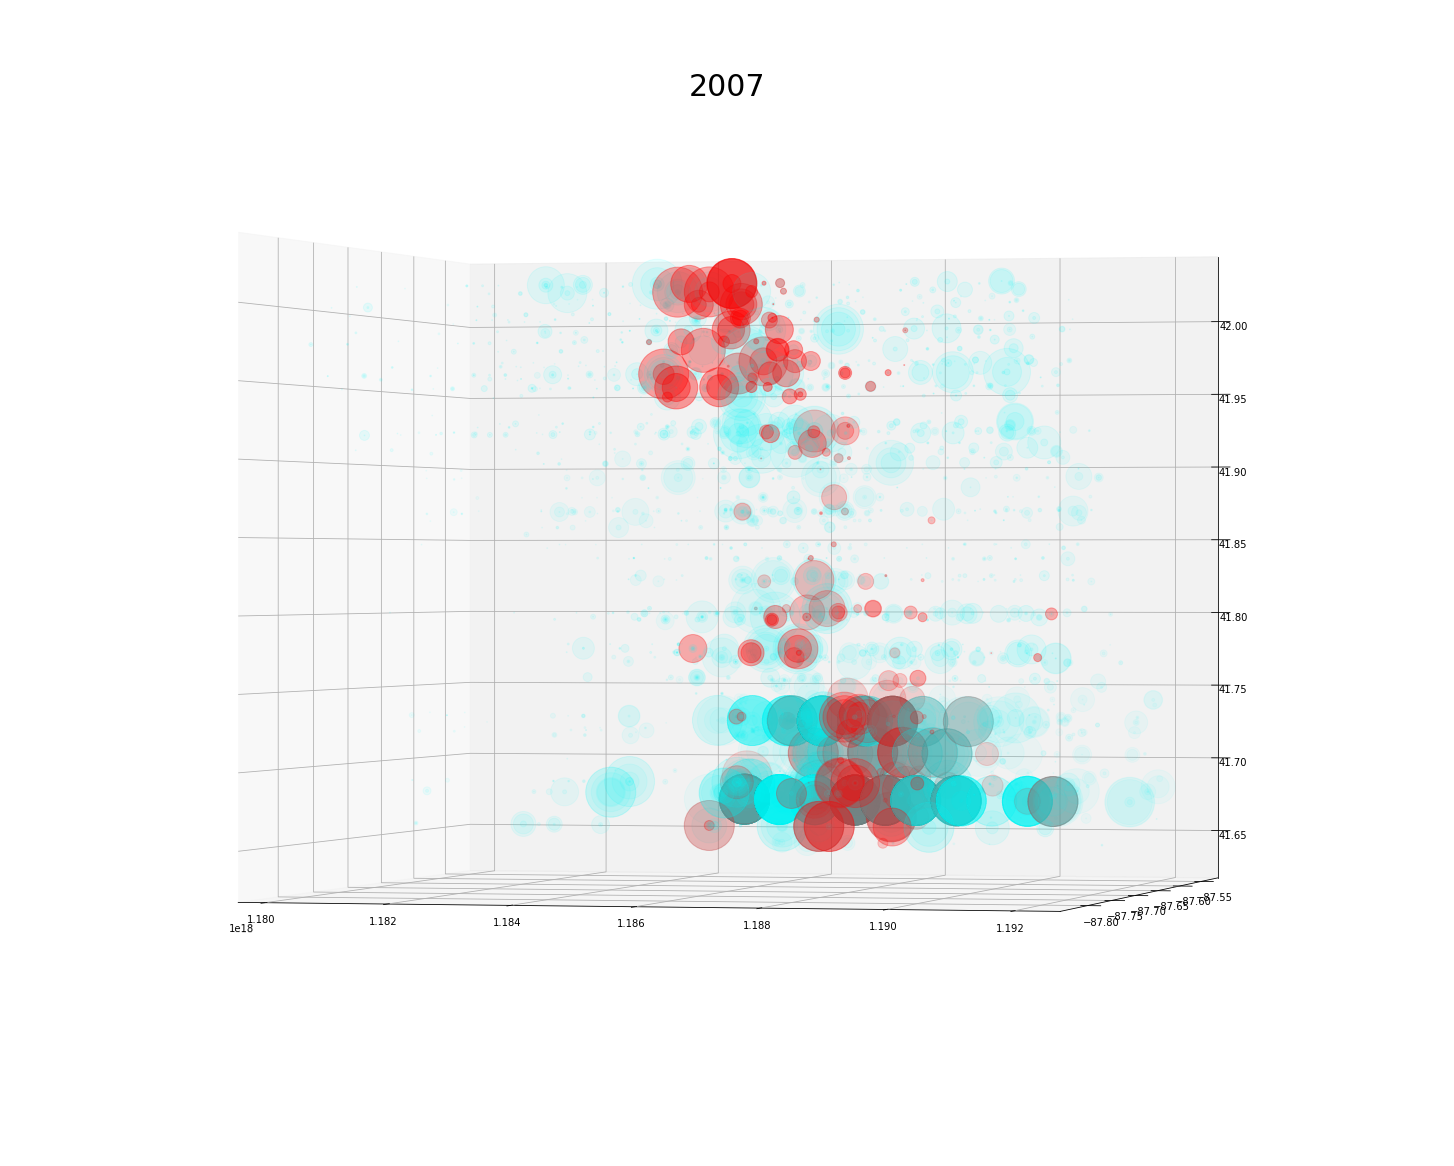

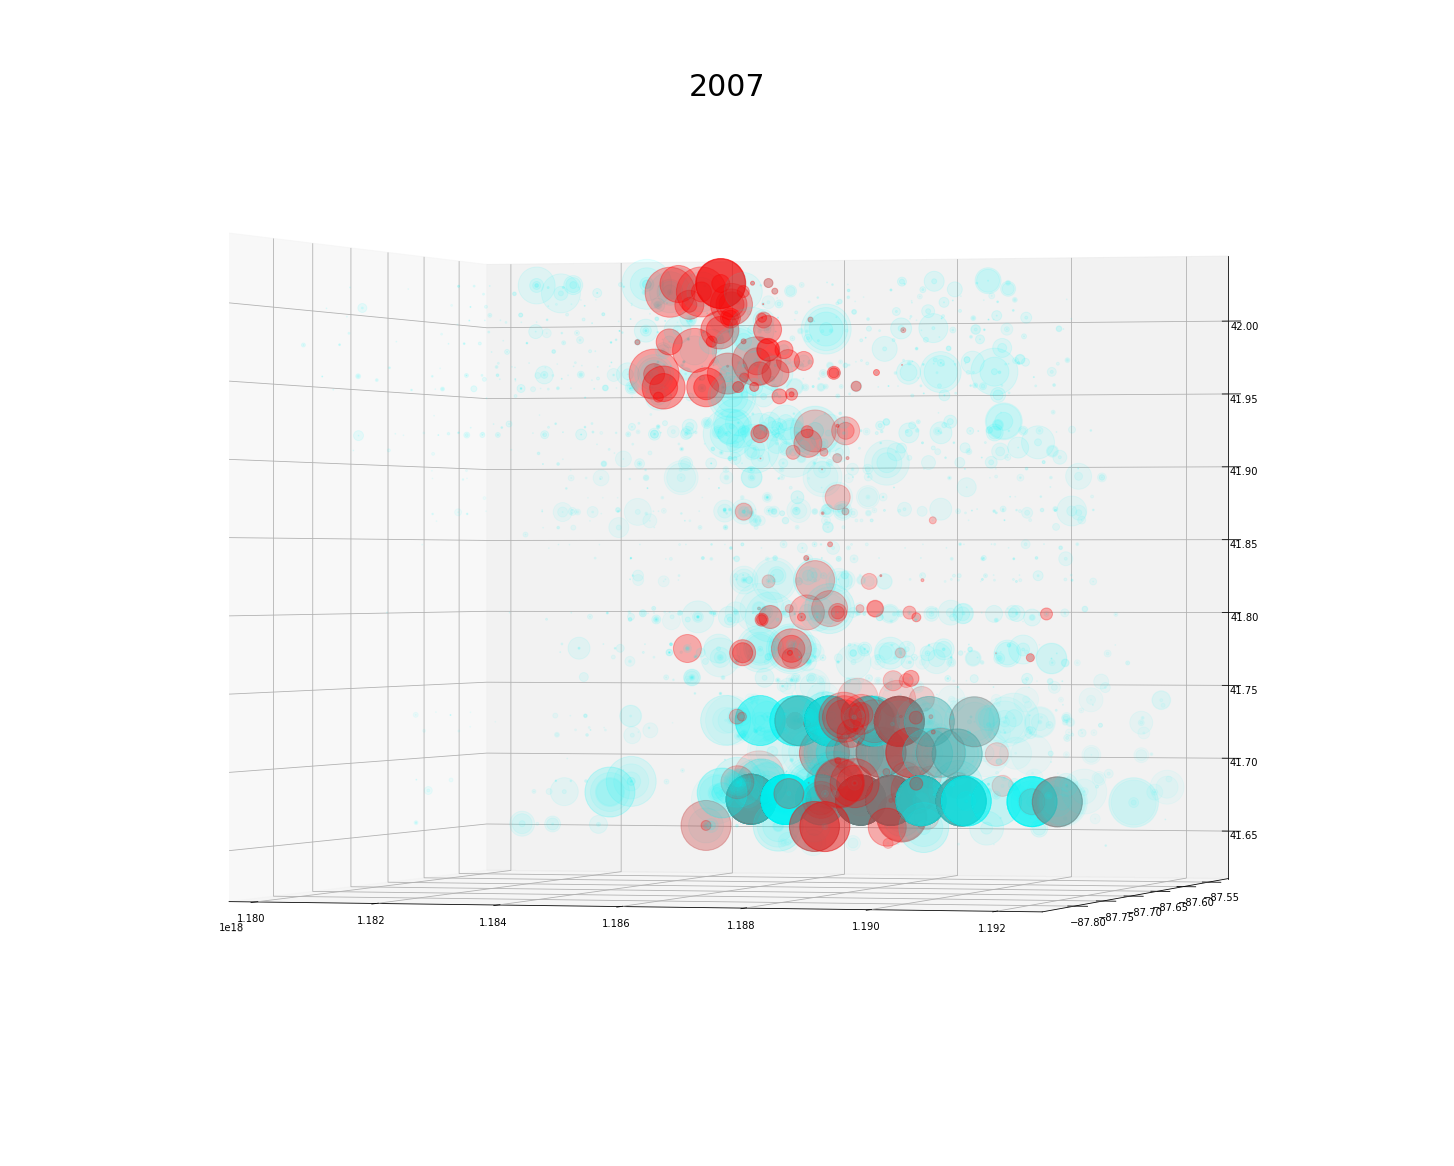

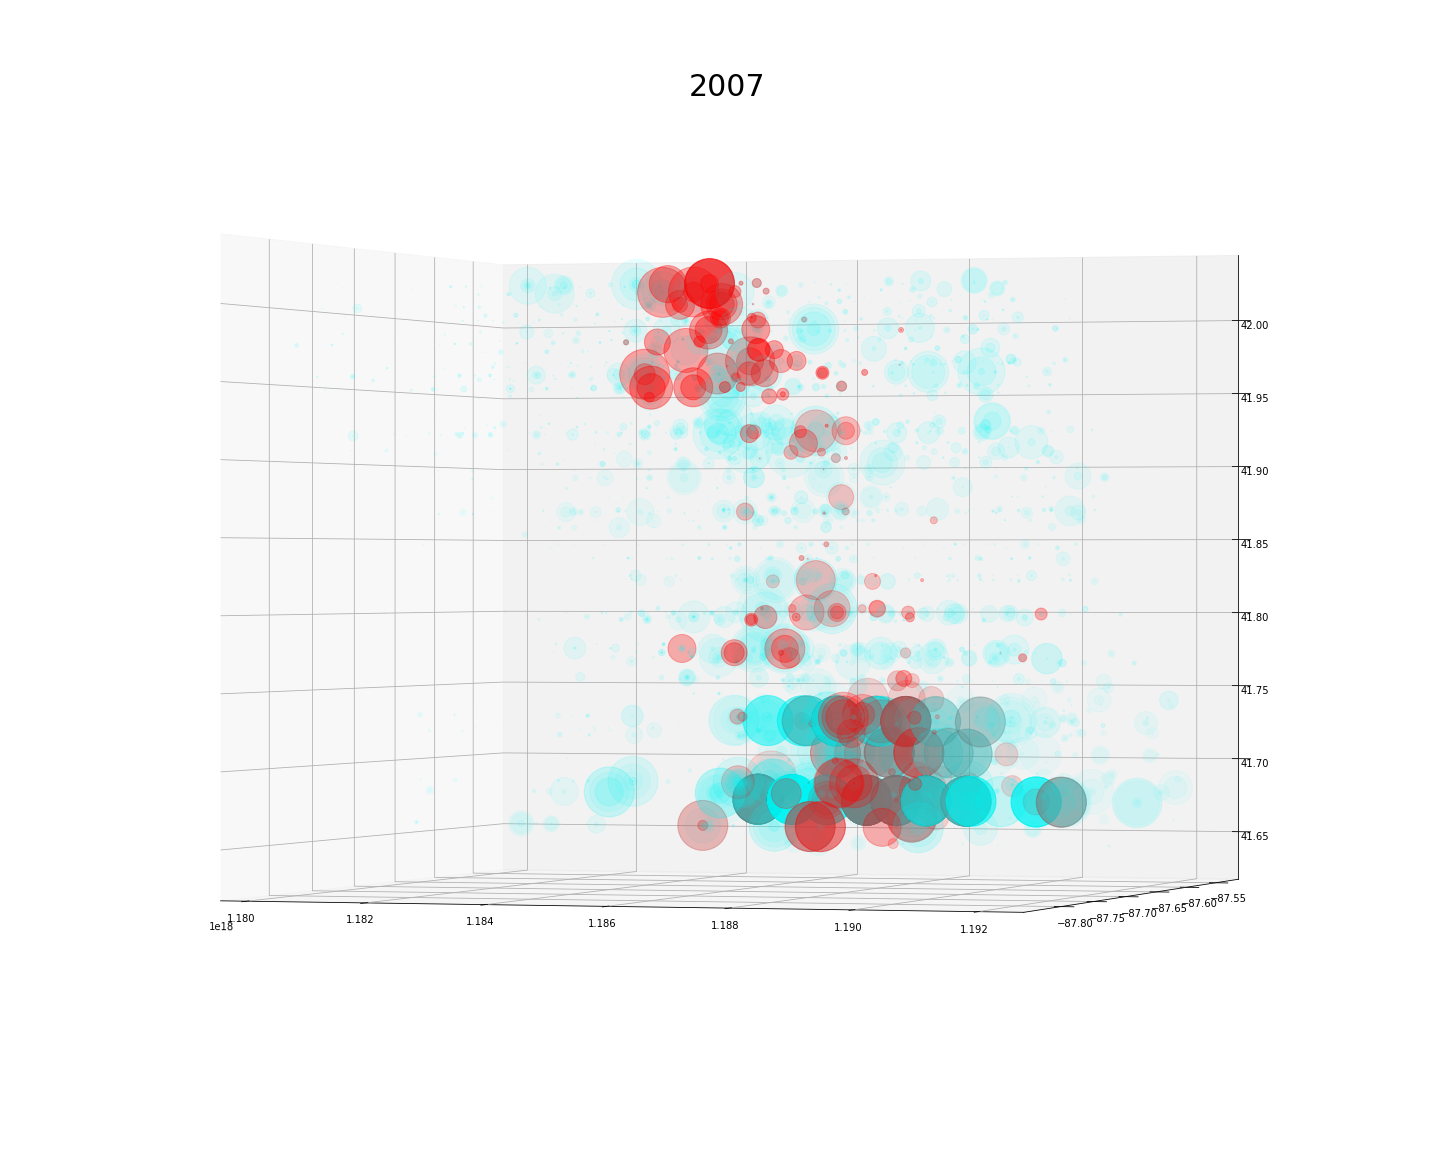

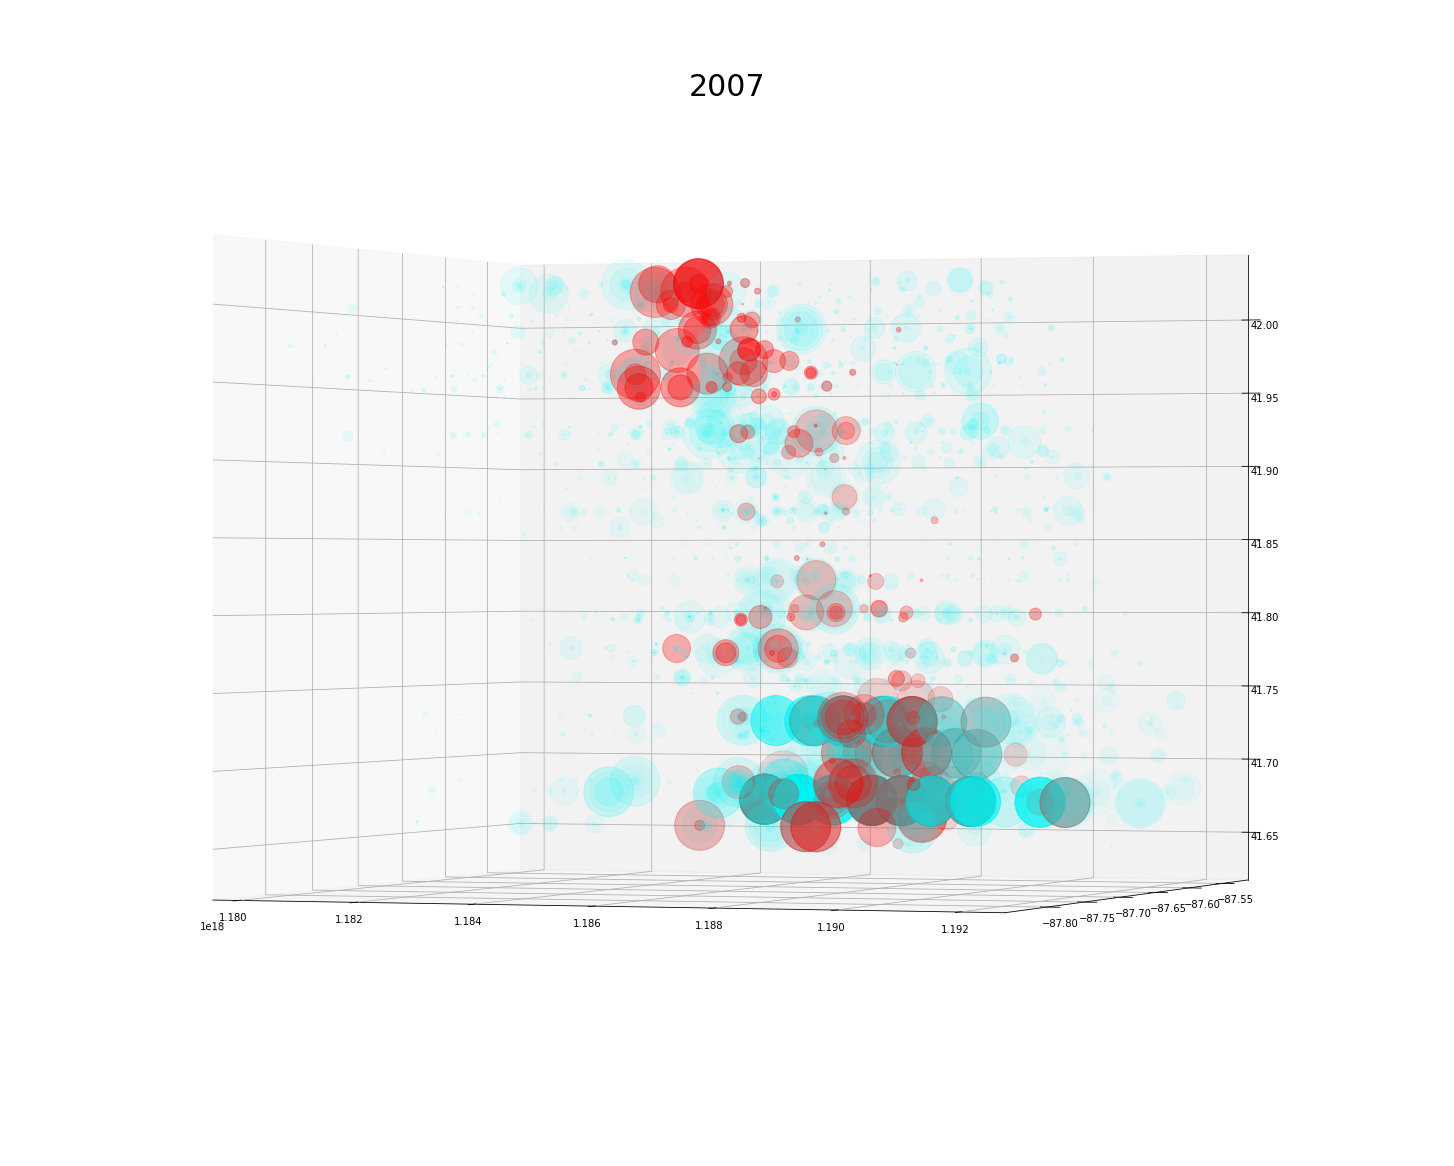

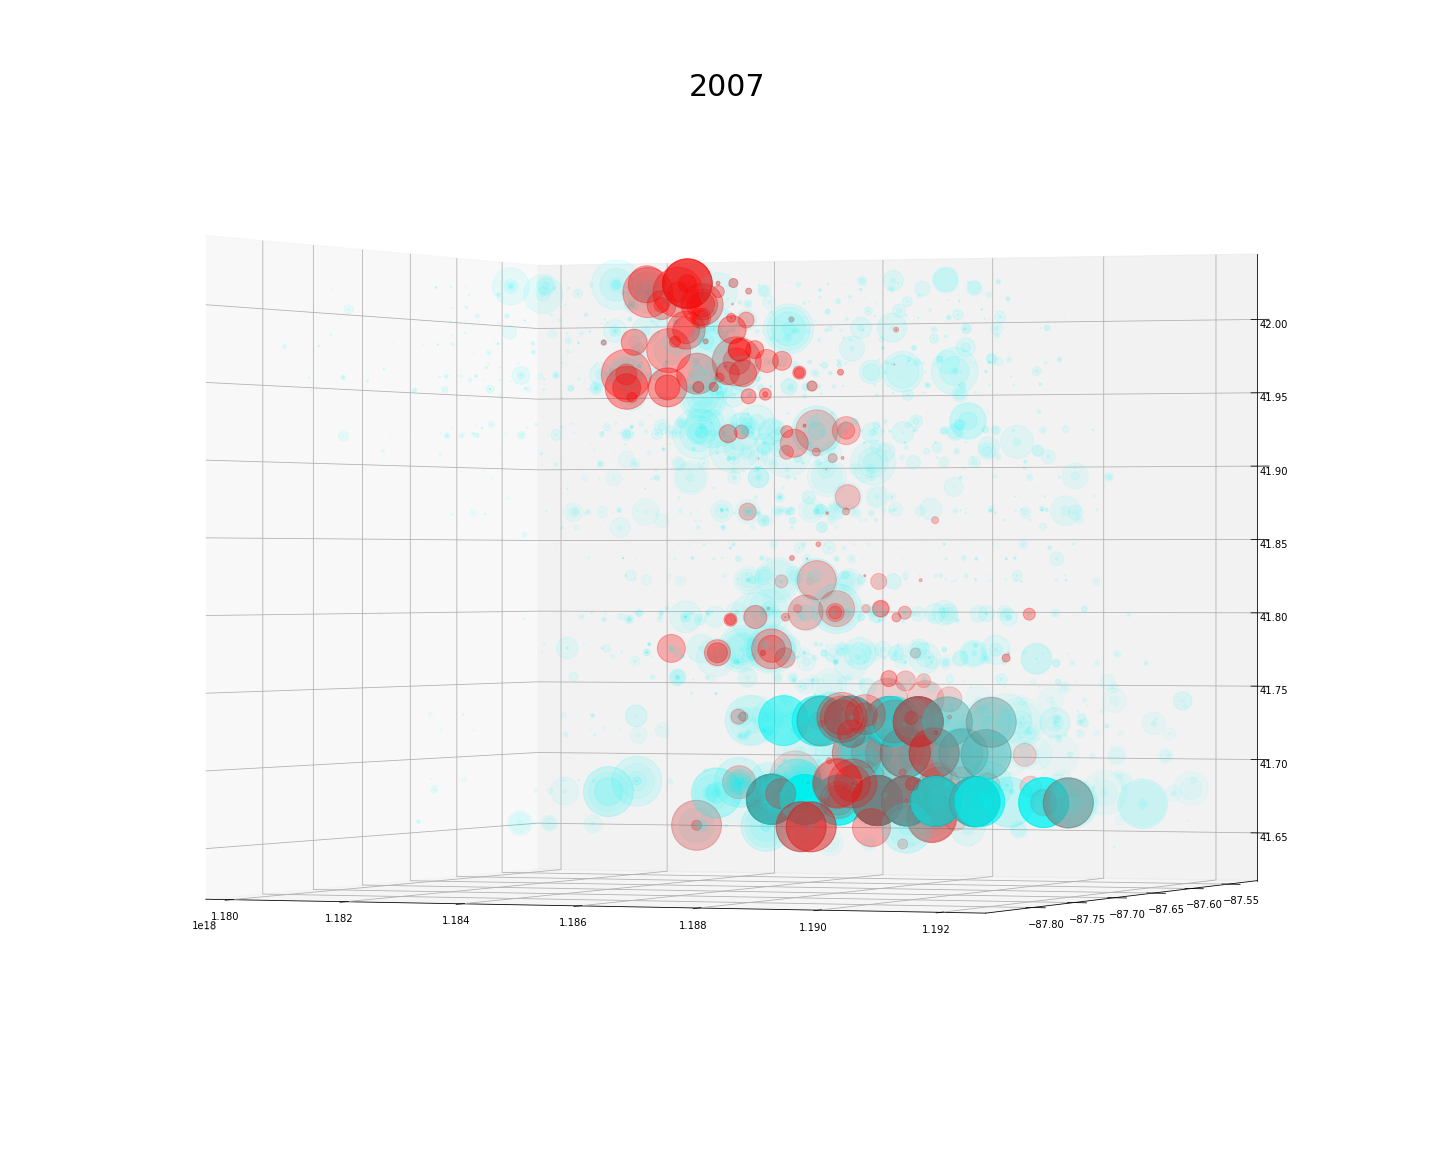

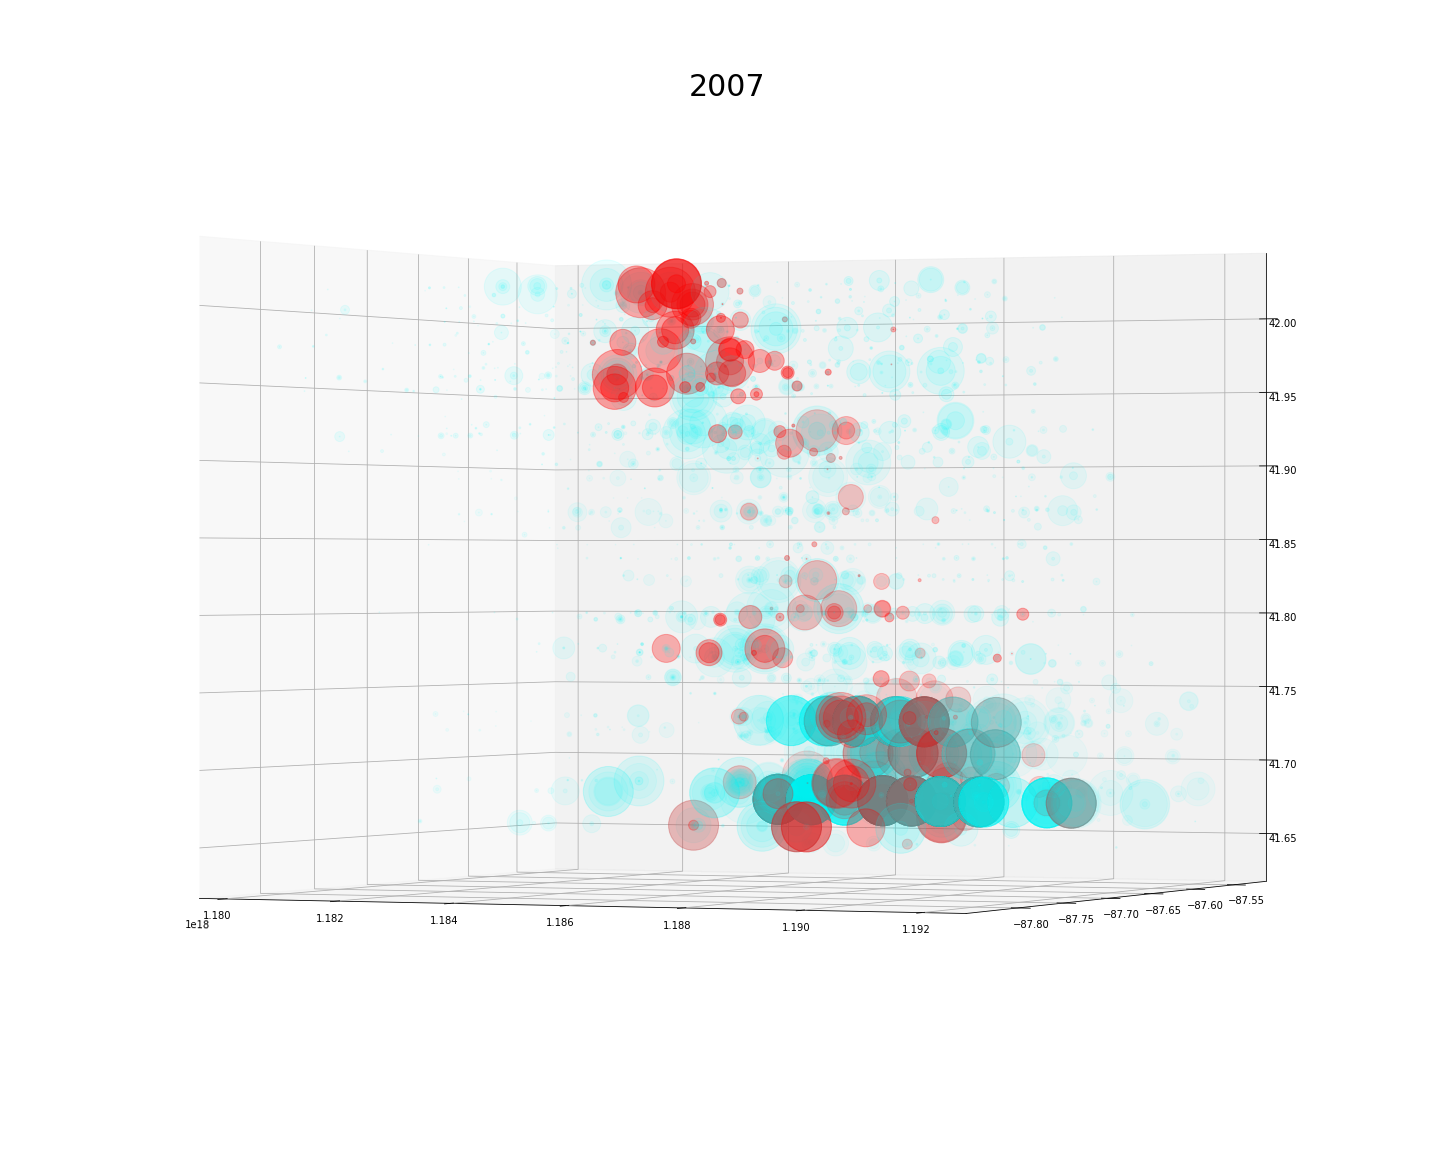

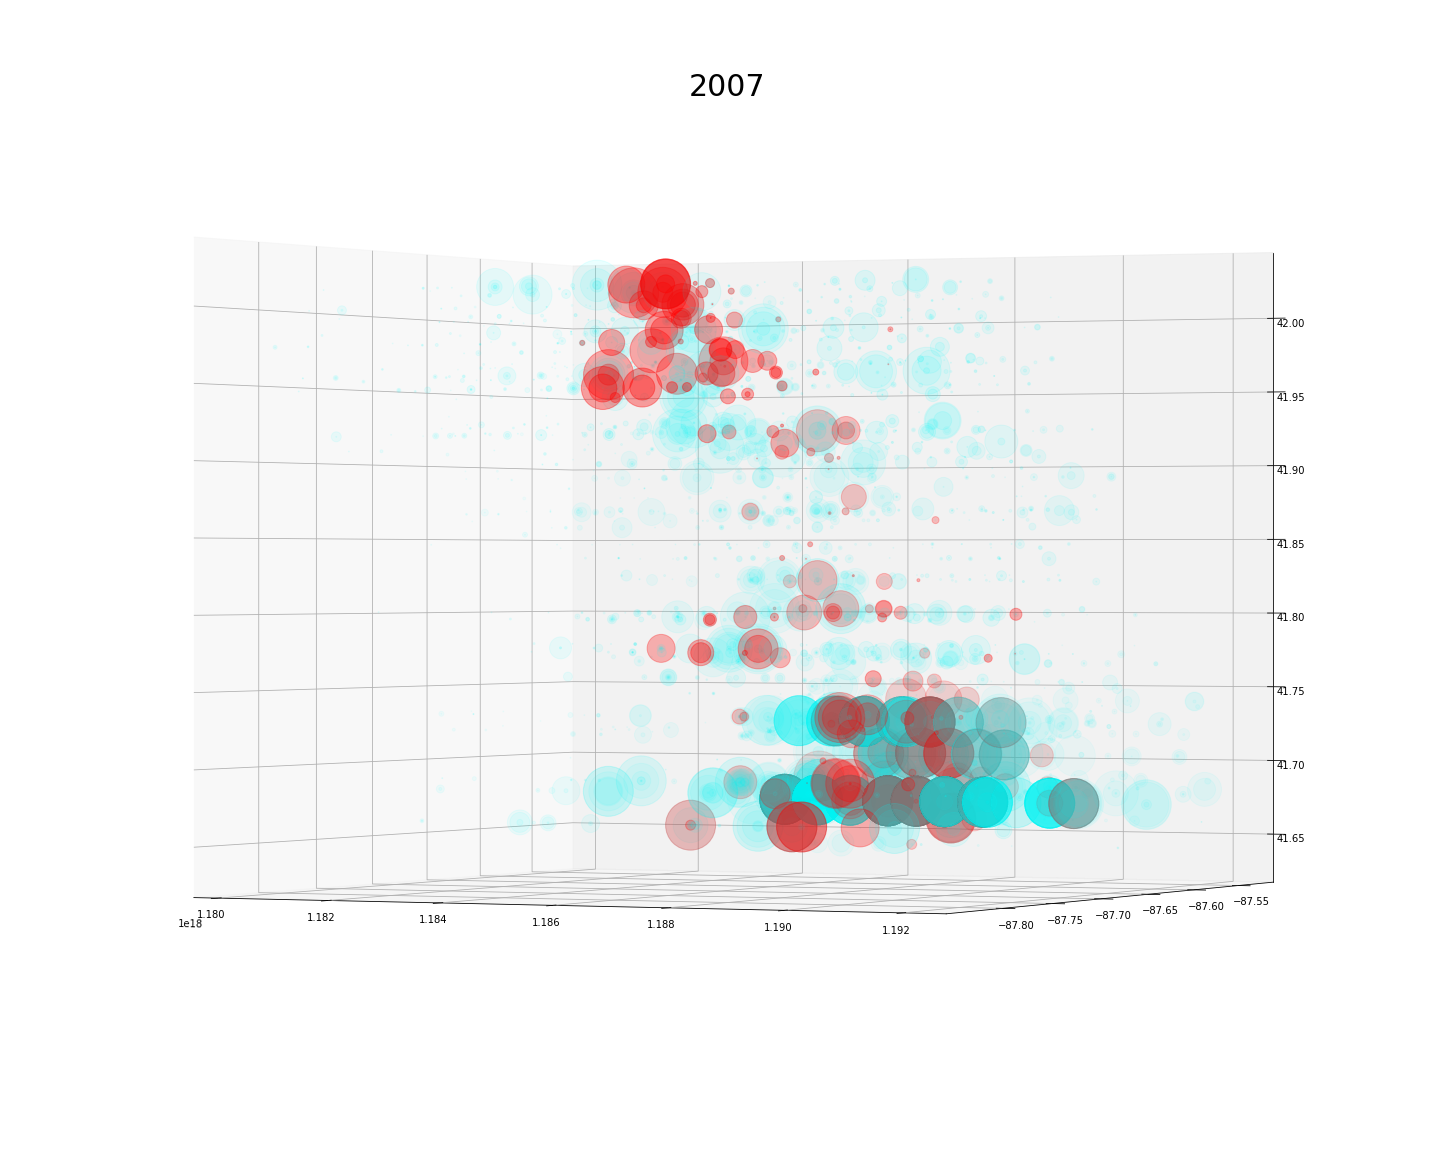

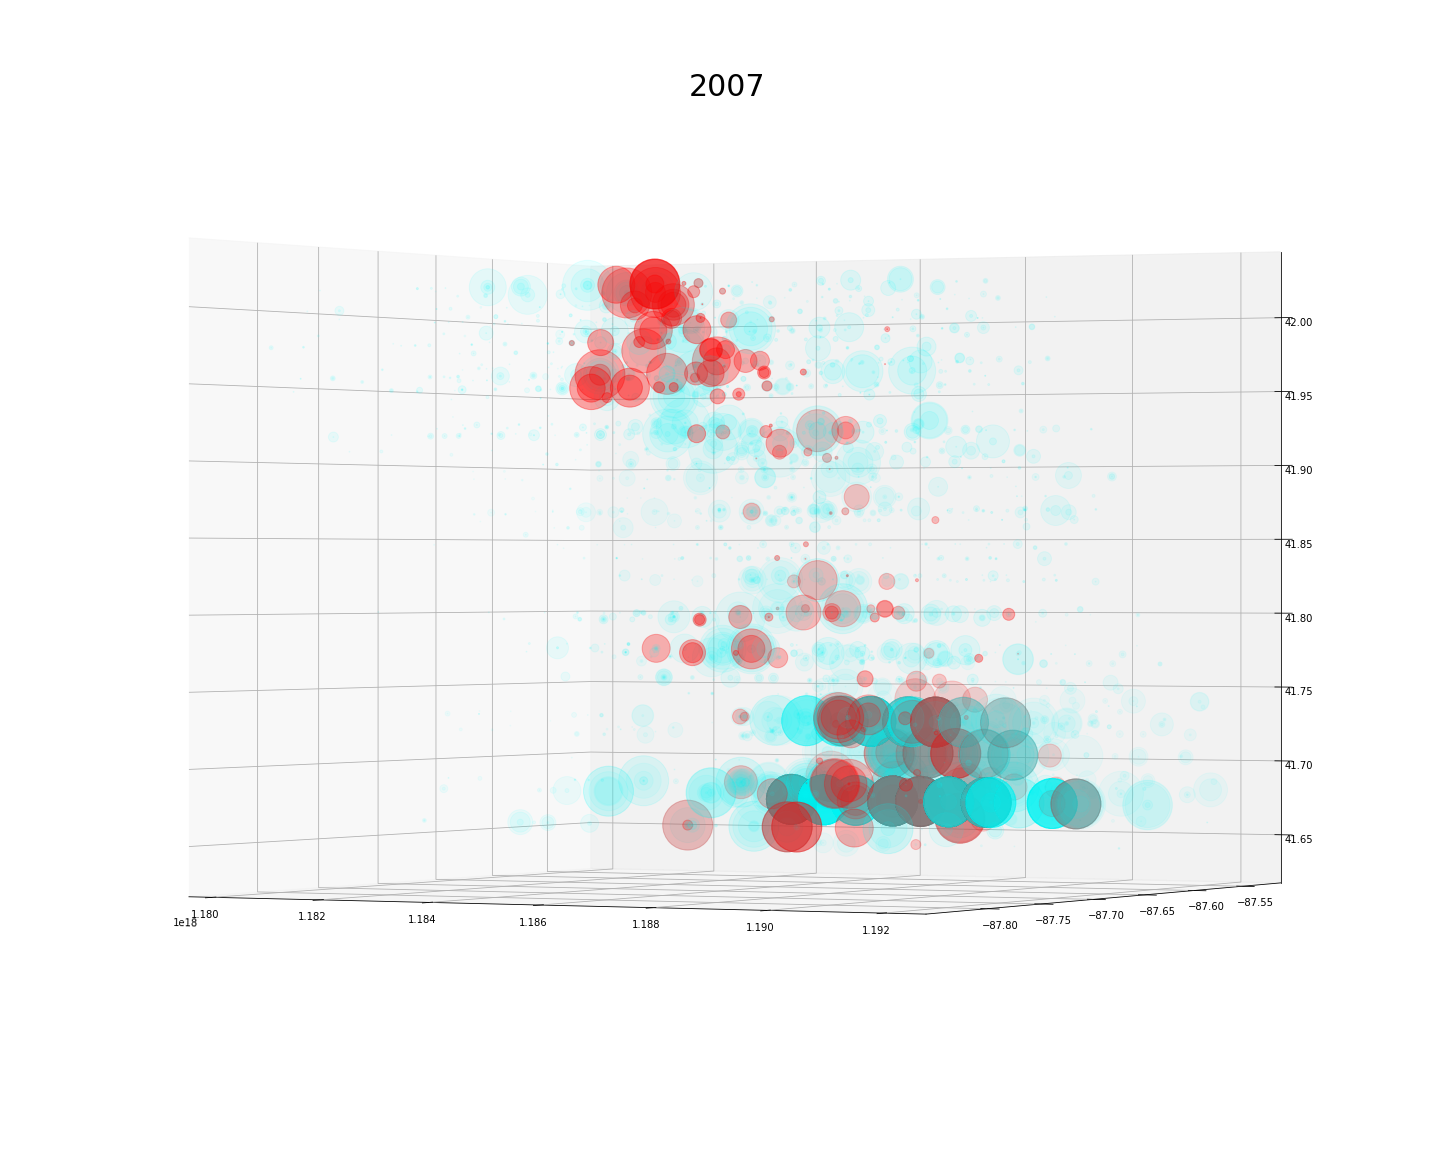

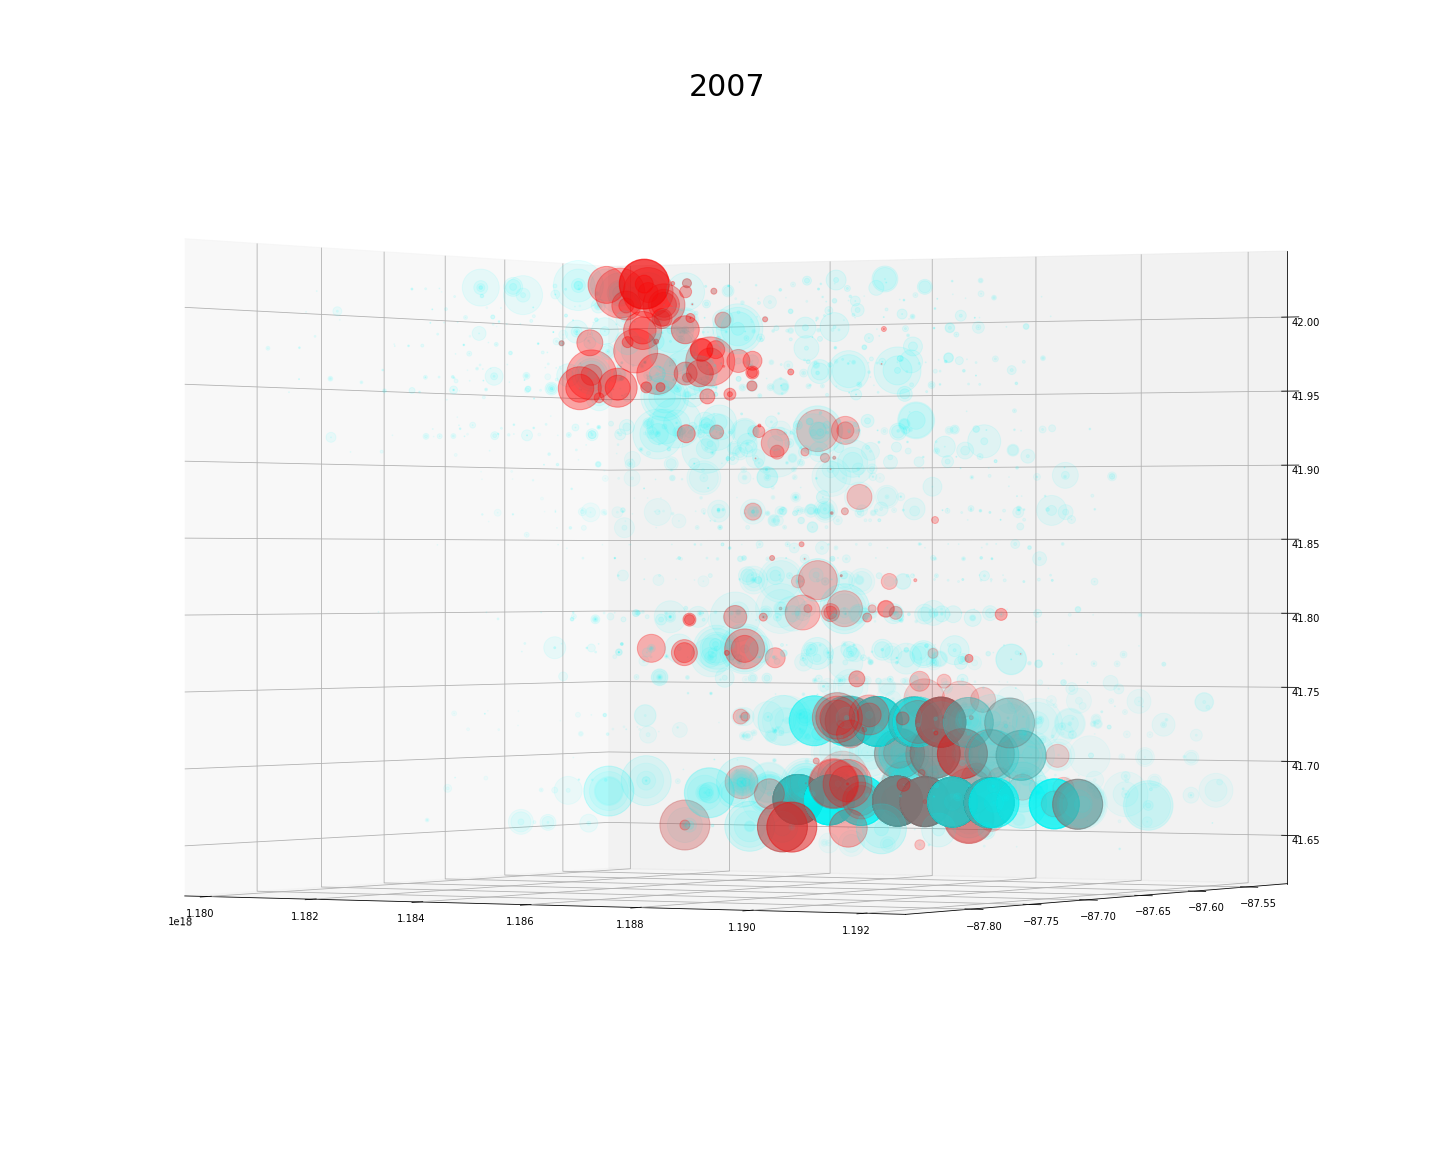

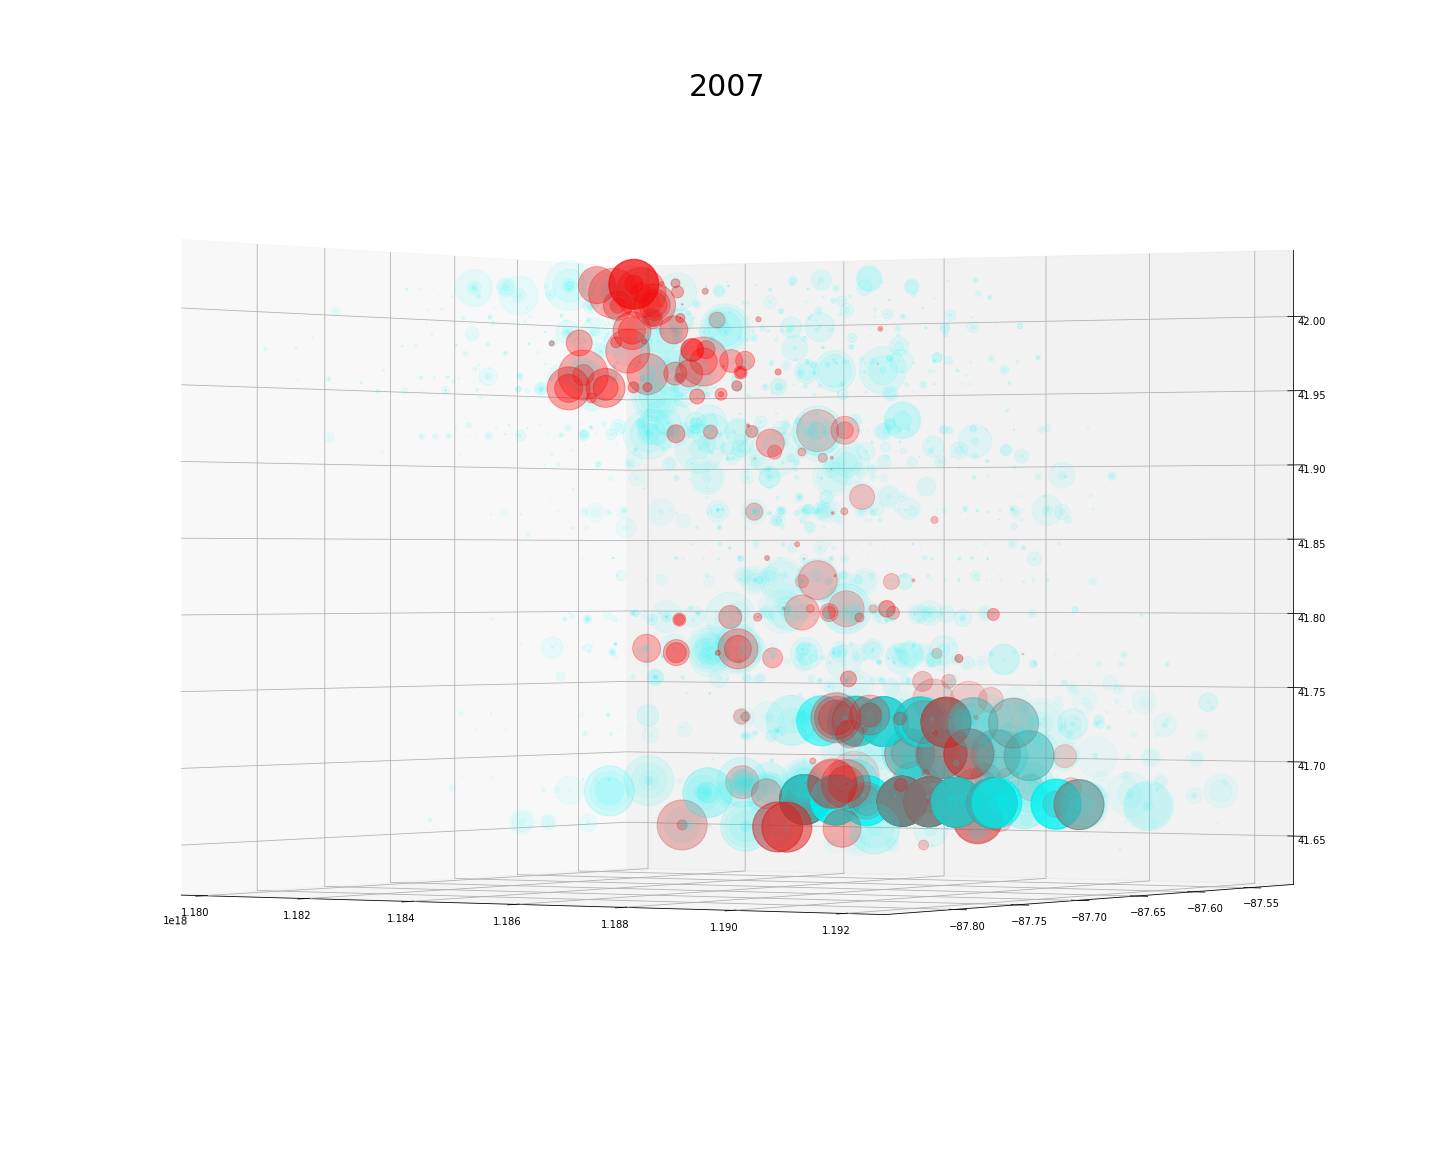

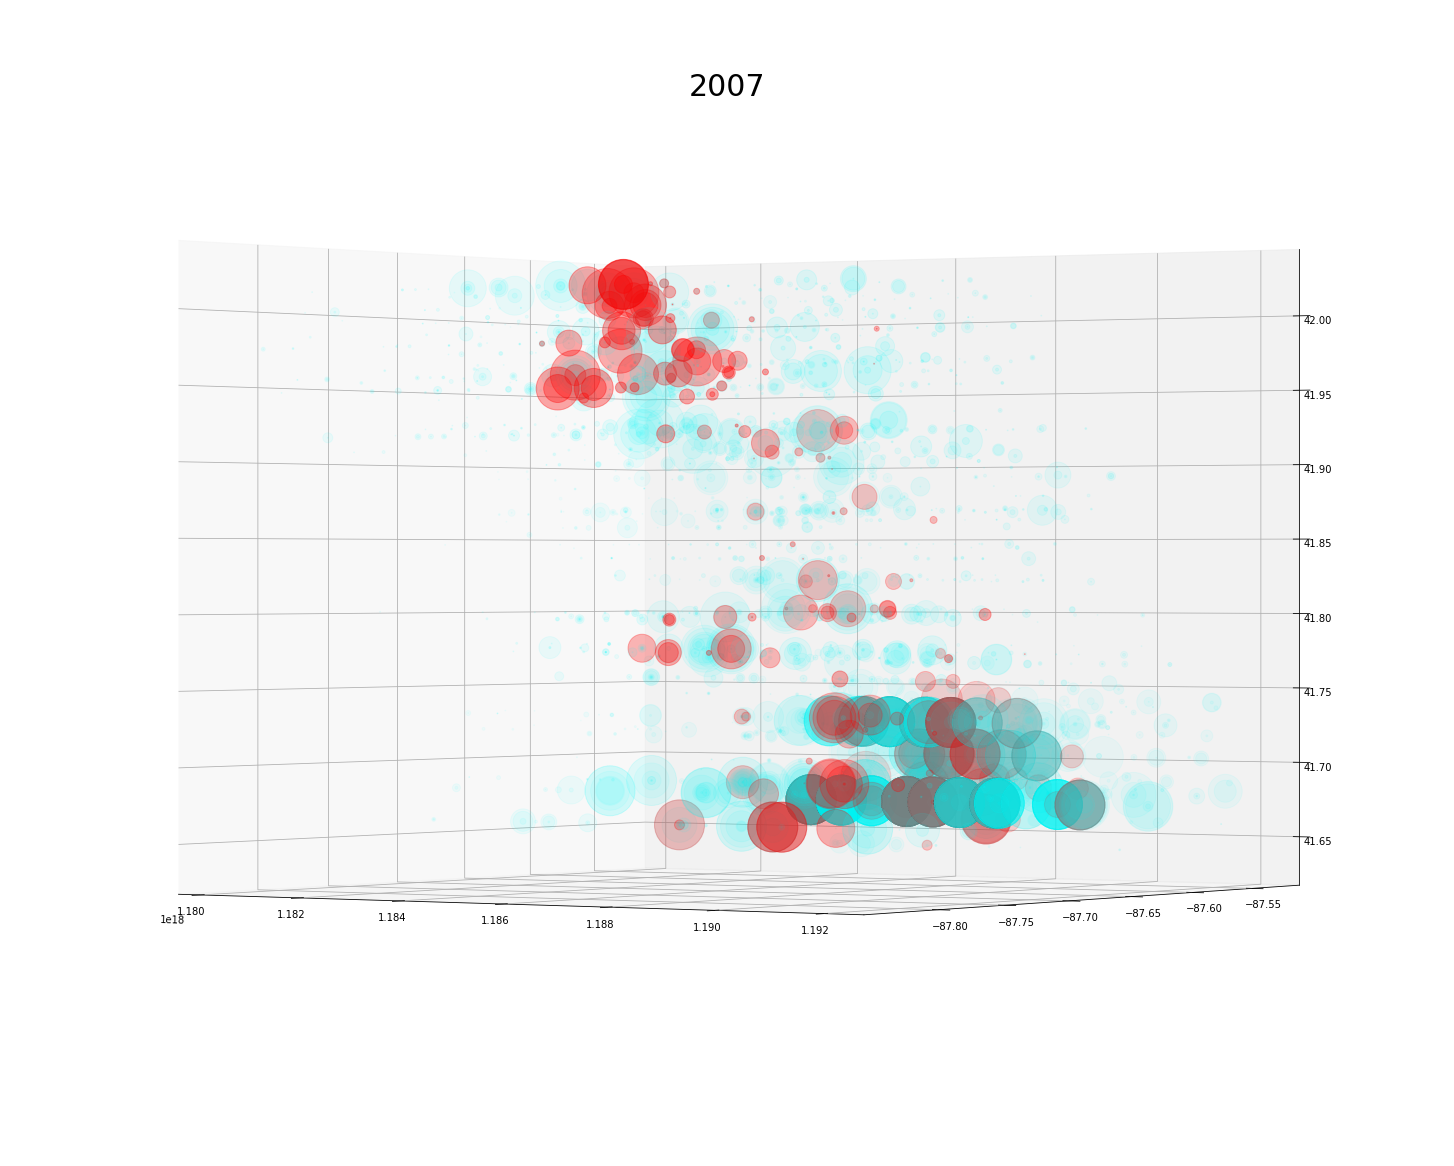

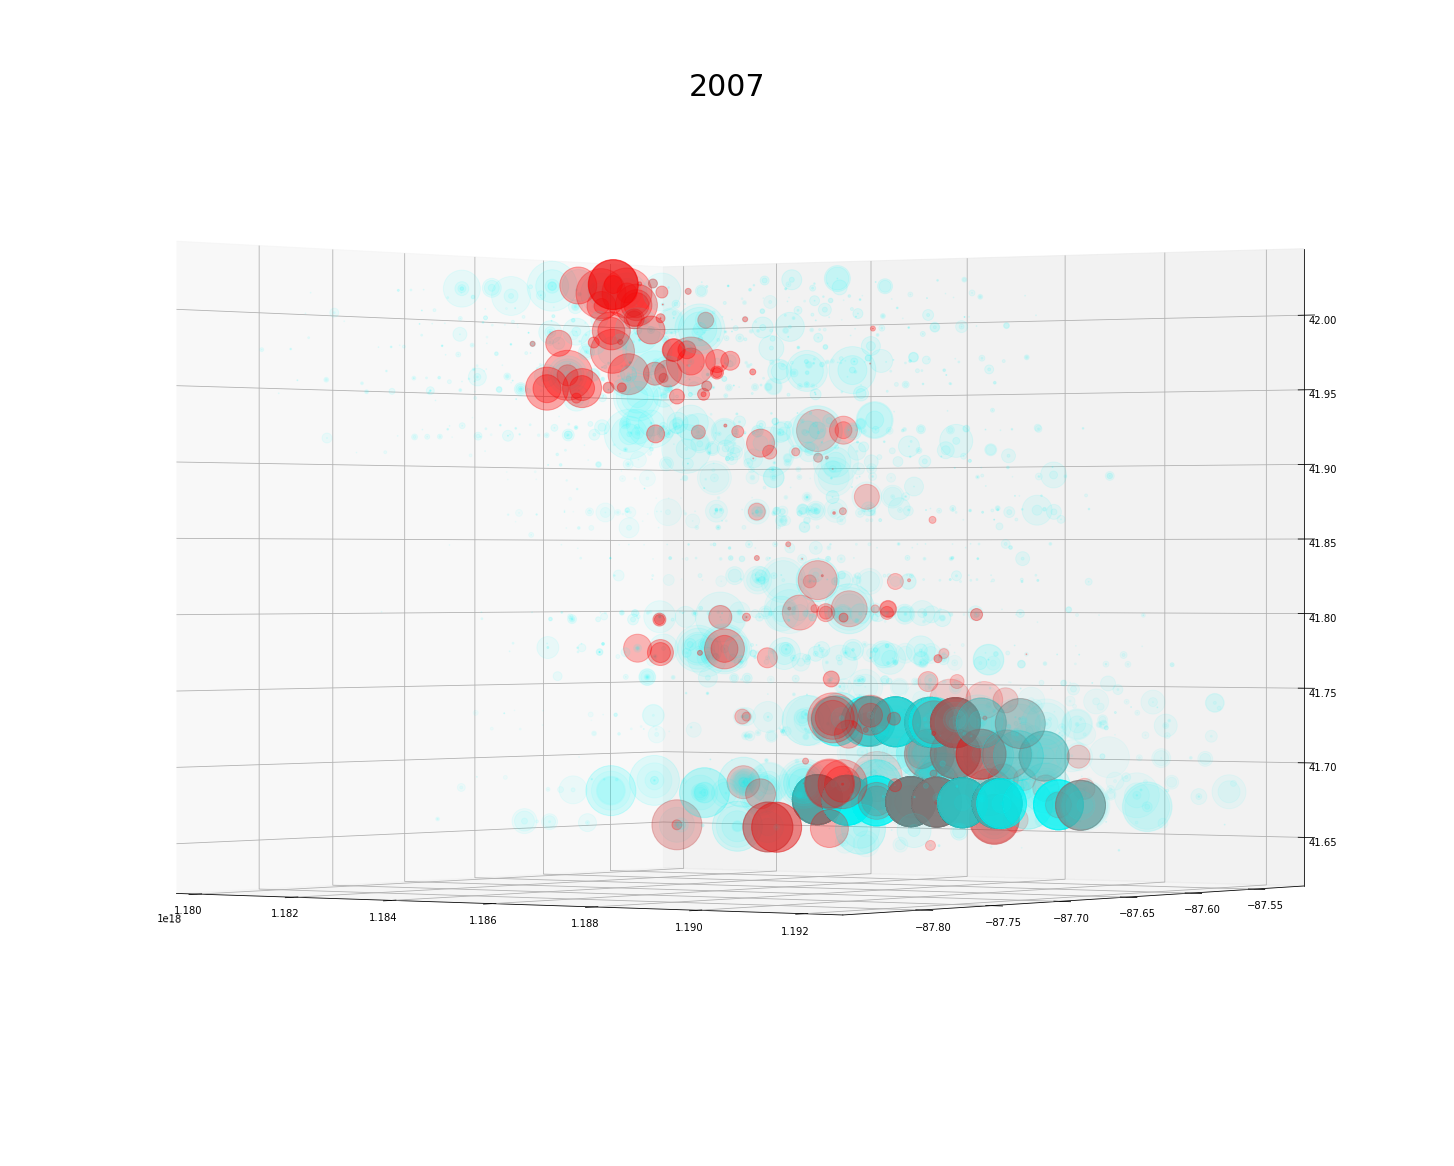

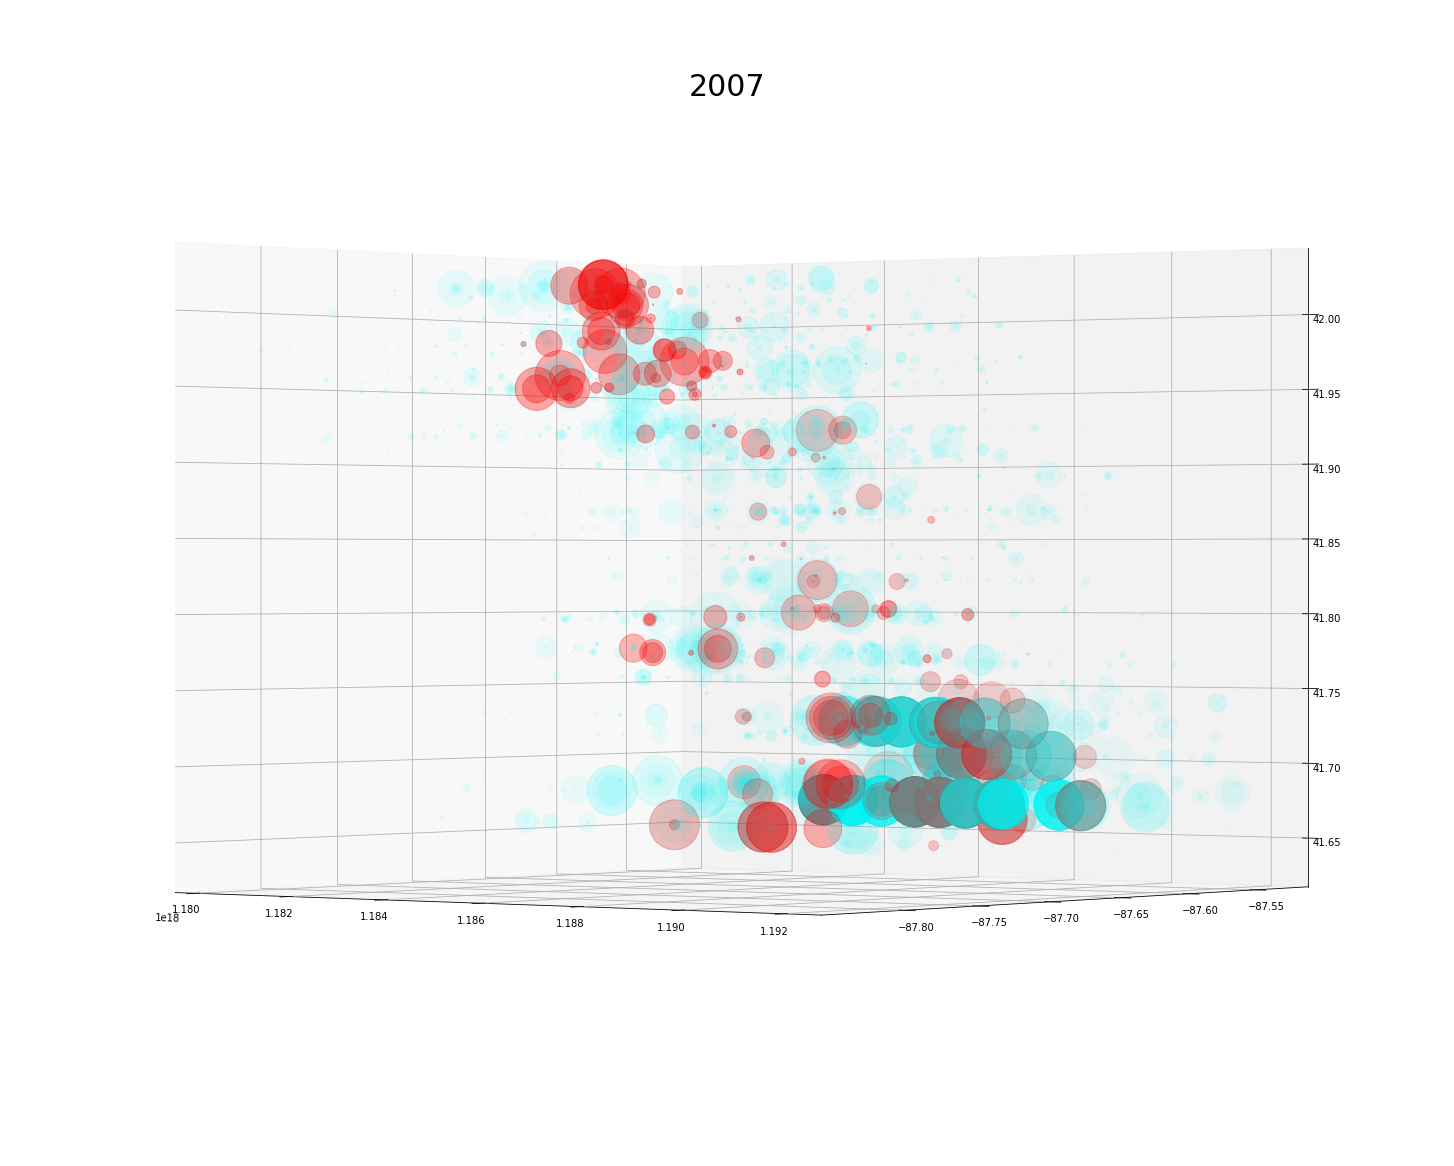

In [ ]:
for year in [2007, 2009, 2011, 2013]:
    ddd = ddd_data[((ddd_data['Date'] > str((year - 1))) & (ddd_data['Date'] < str((year + 1))))]
    x = ddd["Date"].values.tolist()
    y = ddd["Longitude"].values.tolist()
    z = ddd["Latitude"].values.tolist()
    s = [x*x for x in ddd["NumMosquitos"].values.tolist()]
    c = [[x, (1 - x), (1 - x), (.4 if x == 1 else .1)] for x in ddd["WnvPresent"].values.tolist()]
    for i,angle in enumerate(range(270, 480, 2)):
        fig = plt.figure(figsize=(20,16))        
        ax = fig.gca(projection='3d')
        plt.title(year, fontdict={"fontsize":30})
        ax.view_init(0, angle)
#         plt.axis('off')
        plt.tight_layout(pad=0)
        ax.scatter(x, y, z, label='West Nile Virus', s=s, c=c)
        fig.savefig(f"./animations/3d_pictures/{year}-{i}.png", bbox_inches='tight')